# Import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)           # to get different colors
pd.set_option('display.max_columns',None) # to display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Read the processed data

In [4]:
data= pd.read_csv("customer_churn_preprocessed_edadata.csv")
data

,Unnamed: 0,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,0,37,1,0,34.827662,-118.999073,2,9,5,42.39,0,0,16.0,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,1,46,0,0,34.162515,-118.203869,0,9,5,10.69,1,0,10.0,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,2,1,50,0,0,33.645672,-117.922613,0,4,4,33.65,0,2,30.0,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,3,1,78,1,0,38.014457,-122.115432,1,13,3,27.82,0,2,4.0,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,4,0,75,1,0,34.227846,-119.079903,3,3,5,7.38,0,2,11.0,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,7036,0,53,0,0,36.807595,-118.901544,0,1,4,42.09,0,2,9.0,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,7038,0,20,0,0,32.759327,-116.997260,0,13,3,46.68,0,1,59.0,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,7039,1,40,1,0,37.734971,-120.954271,1,22,3,16.20,1,2,17.0,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,7040,1,22,0,0,39.108252,-123.645121,0,2,4,18.62,0,1,51.0,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


**Step:1 Divide data into input and target data**

In [5]:
#here target column is Customer Status
X = data.drop('Customer Status',axis=1)
y = data['Customer Status']

X

,Unnamed: 0,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,0,37,1,0,34.827662,-118.999073,2,9,5,42.39,0,0,16.0,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81
1,1,1,46,0,0,34.162515,-118.203869,0,9,5,10.69,1,0,10.0,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28
2,2,1,50,0,0,33.645672,-117.922613,0,4,4,33.65,0,2,30.0,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45
3,3,1,78,1,0,38.014457,-122.115432,1,13,3,27.82,0,2,4.0,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51
4,4,0,75,1,0,34.227846,-119.079903,3,3,5,7.38,0,2,11.0,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,7036,0,53,0,0,36.807595,-118.901544,0,1,4,42.09,0,2,9.0,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24
4831,7038,0,20,0,0,32.759327,-116.997260,0,13,3,46.68,0,1,59.0,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74
4832,7039,1,40,1,0,37.734971,-120.954271,1,22,3,16.20,1,2,17.0,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10
4833,7040,1,22,0,0,39.108252,-123.645121,0,2,4,18.62,0,1,51.0,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99


In [12]:
X.shape,y.shape

((4835, 31), (4835,))

**Step:2 Split the Train data  and Test data**


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)

In [18]:
(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

((3868, 31), (967, 31), (3868,), (967,))

# Removing the outliers using z-score 
- Before Eda we are doing outliers columns have many less accuracy
- after eda (dropped many columns) so it's easy compare to after preprocessing the data ,more acuuracy**

In [20]:
from scipy import stats

#Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents','Avg Monthly GB Download','Total Refunds',
                    'Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

#Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

#Set a threshold value for outlier detection (e.g : 3)
threshold = 3

#Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores >  threshold)[0]

#Remove the outliers from training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [21]:
X_train.head()

,Unnamed: 0,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
221,311,0,45,1,0,40.689243,-122.037023,0,23,5,38.81,0,2,28.0,0,1,1,1,0,0,0,1,0,0,0,83.80,1900.25,0.0,0,892.63,2792.88
2849,4136,0,21,1,1,32.800671,-116.483363,6,33,2,11.01,1,2,73.0,0,1,1,1,0,0,1,1,0,0,1,88.60,2888.70,0.0,0,363.33,3252.03
3579,5205,0,45,1,0,39.884395,-122.587513,1,2,4,7.70,0,2,22.0,0,0,0,0,0,0,0,0,0,1,0,70.35,120.25,0.0,20,15.40,155.65
198,281,0,58,0,0,37.222842,-121.988727,0,1,4,26.53,0,1,30.0,0,0,0,0,0,0,0,1,0,0,1,44.40,44.40,0.0,0,26.53,70.93
3492,5076,0,65,0,0,34.667815,-117.536183,0,72,0,26.87,1,2,20.0,0,1,1,1,1,1,1,1,2,1,0,108.10,7774.05,0.0,0,1934.64,9708.69


In [24]:
X_test.head()

,Unnamed: 0,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
2690,3909,0,49,1,0,35.490705,-119.286833,1,47,5,6.56,0,1,11.0,1,0,1,0,1,0,0,0,1,1,1,66.05,3021.45,0.0,40,308.32,3369.77
1920,2812,0,49,1,2,38.549185,-121.328386,5,58,1,40.74,0,2,17.0,0,1,1,0,1,0,0,1,0,1,0,91.55,5511.65,0.0,0,2362.92,7874.57
4684,6828,0,59,1,1,33.252830,-116.986079,1,10,3,25.89,0,1,22.0,0,1,0,1,0,1,1,1,0,1,0,65.50,616.90,0.0,0,258.90,875.80
2417,3532,0,63,0,0,37.959706,-121.287669,0,50,5,27.70,1,2,28.0,1,1,0,1,1,1,1,1,2,1,0,109.65,5551.15,0.0,0,1385.00,6936.15
1326,1956,1,23,0,0,39.361283,-123.784599,0,1,5,48.03,0,0,73.0,0,0,0,0,0,0,1,1,0,0,1,45.05,45.05,0.0,0,48.03,93.08


In [25]:
y_train.head()

221     0
2849    1
3579    1
198     0
3492    1
Name: Customer Status, dtype: int64

In [26]:
y_test.head()

2690    1
1920    1
4684    1
2417    0
1326    0
Name: Customer Status, dtype: int64

# Without HyperParameter tuning

# Decision Tree
* Model Develop
* Predictions
* Evalution

**Step:3 Model Develop**

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**Step:4 Model Predictions**

In [30]:
y_pred = dtree.predict(X_test)

In [41]:
print("y predict 10 observations:",y_pred[:10])
print("y test 10 observations:",y_test.values[:10])
print("y predict 5 observations:",y_pred[:5])
print("y test 5 observations:",y_test.values[:5])

y predict 10 observations: [0 1 1 1 0 0 1 1 1 0]
y test 10 observations: [1 1 1 0 0 0 1 1 1 0]
y predict 5 observations: [0 1 1 1 0]
y test 5 observations: [1 1 1 0 0]


**Step:5 Evalution Metrics**

In [43]:
acc_dt = round(accuracy_score(y_test,y_pred),2)
pre_dt = round(precision_score(y_test,y_pred),2)
rec_dt = round(recall_score(y_test,y_pred),2)
f1_dt = round(f1_score(y_test,y_pred),2)
# class_report =  round(classification_report(y_test,y_pred))
# roc_auc_dt = round(roc_auc_score(y_test,y_pred))
# roc_curve_dt = round(roc_curve(y_test,y_pred))
print("accuracy score:",acc_dt)
print("precision score:",pre_dt)
print("recall score:",rec_dt)
print("f1 score:",f1_dt)

accuracy score: 0.75
precision score: 0.81
recall score: 0.81
f1 score: 0.81


**Step:6 Confusion Matrix**

In [48]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
tn,fp,fn,tp

(201, 122, 121, 523)

In [51]:
confusion_matrix(y_test,y_pred)
(tp,fn,fp,tn)

(523, 121, 122, 201)

In [53]:
# With out using built-in methods
acc = (tp+tn)/(tp+tn+fn+fp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = (2 *precision* recall)/(precision+recall)
acc,precision,recall,f1

(0.7487073422957601, 0.8108527131782945, 0.812111801242236, 0.8114817688130332)

**Step:7 Confusion Matrix Display**

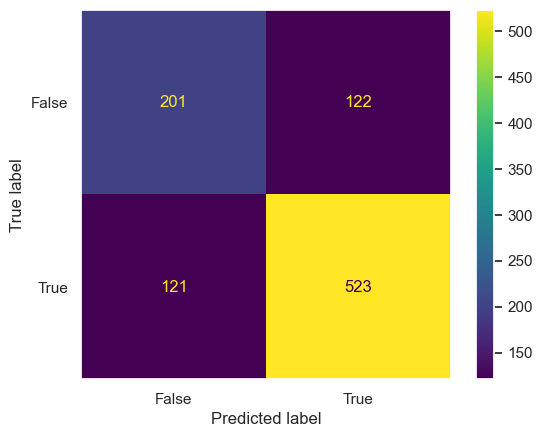

In [57]:
cmt = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cmt,display_labels=[False,True]).plot()
plt.grid(False)

In [58]:
#ROC - AUC
#FPR False Positive rate : x-axis
#TPR True Positive rate: y-axis

In [59]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [60]:
dtree

DecisionTreeClassifier()

In [62]:
dtree.predict_proba(X_test)
#col=1, col=2
#col=1 related
#[0,1]
#When you pass one observation X_test === No Yes
#P(No) =0
#P(Yes) =1
#Final Answer = 1
#top 5 observations: 0:NO, 1:Yes, 1:Yes, 1:Yes, 0:No

#probability  0:No,1:Yes

#Roc-Auc curves takes true positives that means y-axis

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [63]:
dtree.predict_proba(X_test)[:,1]

array([0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1.

**Roc-Auc Curve takes y prediction probability true positive that means : y-axis**

In [65]:
y_predict_prob =dtree.predict_proba(X_test)[:,1]
y_predict_prob

array([0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1.

In [72]:
roc_curve(y_test,y_predict_prob)
#y_score means probability
y_predict =dtree.predict(X_test)
accuracy_score(y_test,y_predict)

0.7487073422957601

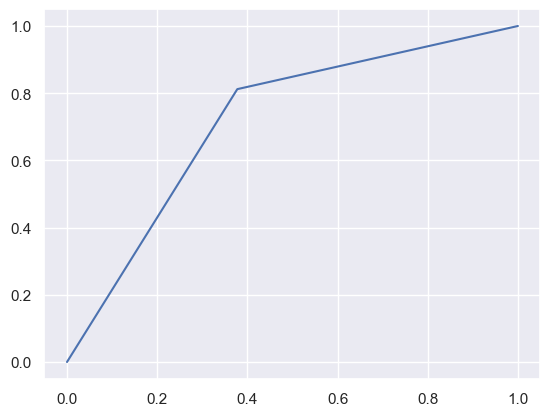

In [73]:
y_predict_prob = dtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_predict_prob)
plt.plot(fpr,tpr)